In [49]:
from SALib.sample import morris as ms
from SALib.analyze import morris as ma
from SALib.plotting import morris as mp
from mesa.visualization.ModularVisualization import ModularServer
from mesa.batchrunner import BatchRunner
from model.model import SOBAModel
import datetime as dt
import os
import subprocess
import configuration.defineOccupancy as co
import csv
import numpy as np
import matplotlib.pyplot as plt
from tempfile import mkstemp
from shutil import move
from os import fdopen, remove
import numpy as np
import matplotlib.pyplot as plt

In [50]:
def replace(file_path, pattern, subst):
    #Create temp file
    fh, abs_path = mkstemp()
    with fdopen(fh,'w') as new_file:
        with open(file_path) as old_file:
            for line in old_file:
                new_file.write(line.replace(pattern, subst))
    #Remove original file
    remove(file_path)
    #Move new file
    move(abs_path, file_path)

In [51]:
def energy_model(data, nAux):

    y = []
    n = str(nAux)

    replace("configuration/settings.py", "model = 0", "model = "+n)
    replace("configuration/defineOccupancy.py", "NProfessors = 40", "NProfessors = "+str(data[0]))
    replace("configuration/defineOccupancy.py", "NResearches = 40", "NResearches = "+str(data[0]))
    replace("configuration/defineOccupancy.py", "TconfortProfessors = [19, 27]", "TconfortProfessors = "+str(data[1]))
    replace("configuration/defineOccupancy.py", "TconfortResearchers = [19, 27]", "TconfortResearchers = "+str(data[1]))
    replace("configuration/defineOccupancy.py", "behaviourEnvironmentProfessors = [25, 60, 15]", "behaviourEnvironmentProfessors = "+str(data[2]))
    replace("configuration/defineOccupancy.py", "behaviourEnvironmentResearchers = [35, 60, 5]", "behaviourEnvironmentResearchers = "+str(data[2]))
    
    proc = subprocess.run(['python', 'batch.py'], shell = False)

    print('¡Cambio de valores!')
    if os.path.exists("log/tmp/occupants.txt"):
        os.remove("log/tmp/occupants.txt")
    if os.path.exists("log/tmp/rooms.txt"):
        os.remove("log/tmp/rooms.csv")
    replace("configuration/settings.py", "model = "+n, "model = 0")
    replace("configuration/defineOccupancy.py", "NProfessors = "+str(data[0]), "NProfessors = 40")
    replace("configuration/defineOccupancy.py", "NResearches = "+str(data[0]), "NResearches = 40")
    replace("configuration/defineOccupancy.py", "TconfortProfessors = "+str(data[1]), "TconfortProfessors = [19, 27]")
    replace("configuration/defineOccupancy.py", "TconfortResearchers = "+str(data[1]), "TconfortResearchers = [19, 27]")
    replace("configuration/defineOccupancy.py", "behaviourEnvironmentProfessors = "+str(data[2]), "behaviourEnvironmentProfessors = [25, 60, 15]")
    replace("configuration/defineOccupancy.py", "behaviourEnvironmentResearchers = "+str(data[2]), "behaviourEnvironmentResearchers = [35, 60, 5]")

    with open("/home/merinom/Desktop/GreenSOBA/results/M"+n+"/energyByDayTotal.csv") as csvfile1, open("/home/merinom/Desktop/GreenSOBA/results/M"+ n +"/energyByDayLPC.csv") as csvfile2, open("/home/merinom/Desktop/GreenSOBA/results/M"+n+"/energyByDayHVAC.csv") as csvfile3:
        readCSV = csv.reader(csvfile1, delimiter=',')
        for row in readCSV:
            if row[0] == 'total':
                print(row[1])
                print(np.maximum(0, np.minimum(float(row[1]), 10000000000000000000)))
                y.append(np.maximum(0, np.minimum(float(row[1]), 10000000000000000000)))
        readCSV = csv.reader(csvfile2, delimiter=',')
        for row in readCSV:
            if row[0] == 'total':
                print(row[1])
                print(np.maximum(0, np.minimum(float(row[1]), 10000000000000000000)))
                y.append(np.maximum(0, np.minimum(float(row[1]), 10000000000000000000)))
        readCSV = csv.reader(csvfile3, delimiter=',')
        for row in readCSV:
            if row[0] == 'total':
                print(row[1])
                print(np.maximum(0, np.minimum(float(row[1]), 10000000000000000000)))
                y.append(np.maximum(0, np.minimum(float(row[1]), 10000000000000000000)))
    return y

In [52]:
def model(data, n):
    values = []
    for i in data:
        values.append(energy_model(i, n))
    return values

In [53]:
number_sims = 4


people = np.random.randint(low=0, high=40, size=number_sims)

temperature = []
temperature1 = np.random.randint(low=18, high=30, size=number_sims)
temperature2 = np.random.randint(low=18, high=30, size=number_sims)
for i in range(number_sims):
    if temperature2[i] < temperature1[i]:
        temperature.append([temperature1[i], temperature1[i]])
    else:
        temperature.append([temperature1[i], temperature2[i]])

behaviour = []
behaviour1 = np.random.randint(low=0, high=100, size=number_sims)
behaviour2 = np.random.randint(low=0, high=100, size=number_sims)
behaviour3 = np.random.randint(low=0, high=100, size=number_sims)
for i in range(number_sims):
    behaviour.append([behaviour1[i], behaviour2[i], behaviour3[i]])


data = []
print(behaviour)

for n in range(number_sims):
    a = [people[n], temperature[n], behaviour[n]]
    data.append(a)

for i in range(0,3):
    y = model(data, i)
    if i == 0:
        y0 = y
    elif i == 1:
        y1 = y
    else:
        y2 = y
        


[[75, 14, 31], [85, 60, 1], [48, 41, 36], [47, 99, 68]]
¡Cambio de valores!
2393429.0957421474
2393429.09574
833783.8500000028
833783.85
1559645.2457421492
1559645.24574
¡Cambio de valores!
1935549.7062473767
1935549.70625
442709.49999999715
442709.5
1492840.2062473819
1492840.20625
¡Cambio de valores!
1858860.3687302428
1858860.36873
364160.2999999995
364160.3
1494700.0687302507
1494700.06873
¡Cambio de valores!
2559216.9354488105
2559216.93545
978257.1000000013
978257.1
1580959.8354488122
1580959.83545
¡Cambio de valores!
2025175.6516243846
2025175.65162
663131.7999999993
663131.8
1362043.8516243838
1362043.85162
¡Cambio de valores!
1517452.1651601389
1517452.16516
275450.9500000002
275450.95
1242001.2151601356
1242001.21516
¡Cambio de valores!
1541332.1305801014
1541332.13058
293905.1999999997
293905.2
1247426.930580102
1247426.93058
¡Cambio de valores!
1780760.4083053817
1780760.40831
471038.14999999927
471038.15
1309722.2583053824
1309722.25831
¡Cambio de valores!
2184481.36250496

[[2393429.0957421474, 833783.85000000277, 1559645.2457421492], [1935549.7062473767, 442709.49999999715, 1492840.2062473819], [1858860.3687302428, 364160.29999999952, 1494700.0687302507], [2559216.9354488105, 978257.10000000126, 1580959.8354488122]]
[[2025175.6516243846, 663131.79999999935, 1362043.8516243838], [1517452.1651601389, 275450.95000000019, 1242001.2151601356], [1541332.1305801014, 293905.19999999972, 1247426.9305801019], [1780760.4083053817, 471038.14999999927, 1309722.2583053824]]
[[2184481.3625049694, 673607.79999999865, 1510873.5625049667], [1584425.9706515472, 275212.79999999981, 1309213.1706515455], [1792674.5764406277, 326750.99999999994, 1465923.576440627], [1823971.9456865096, 470913.54999999958, 1353058.3956865056]]


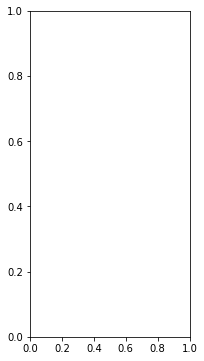

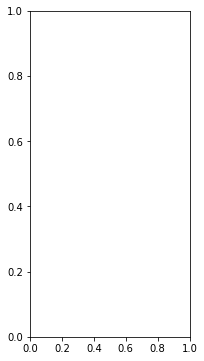

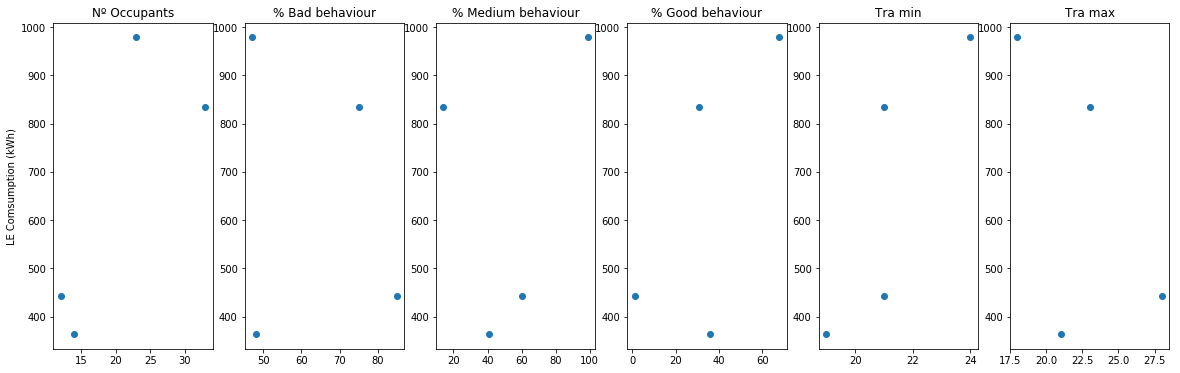

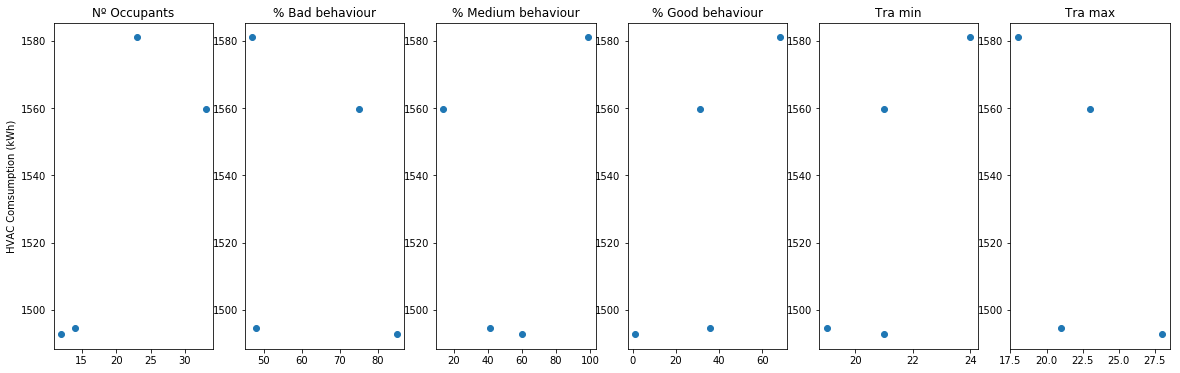

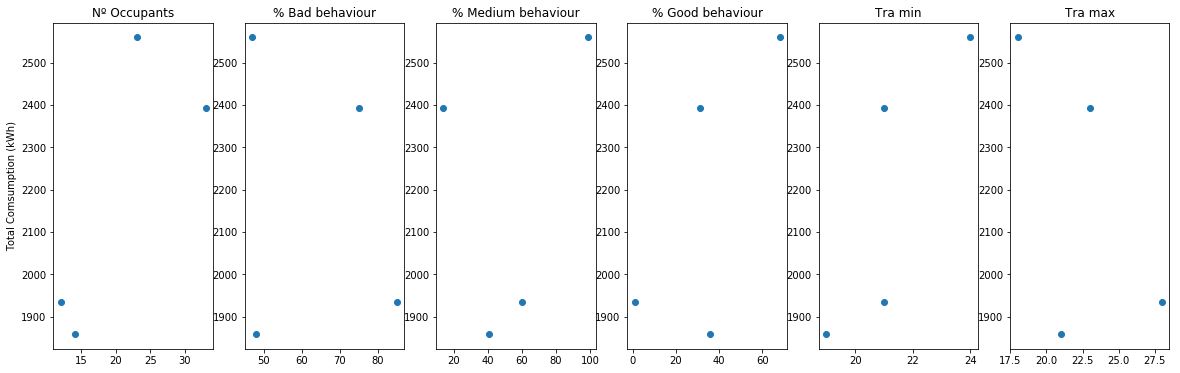

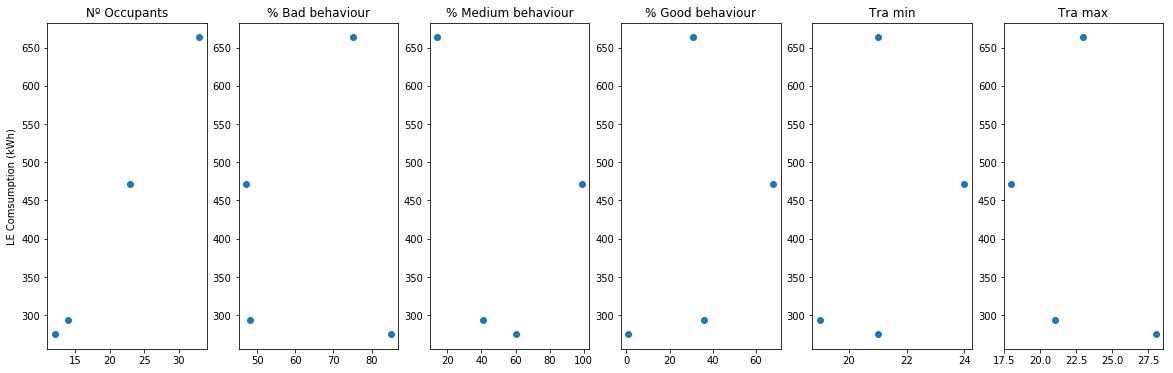

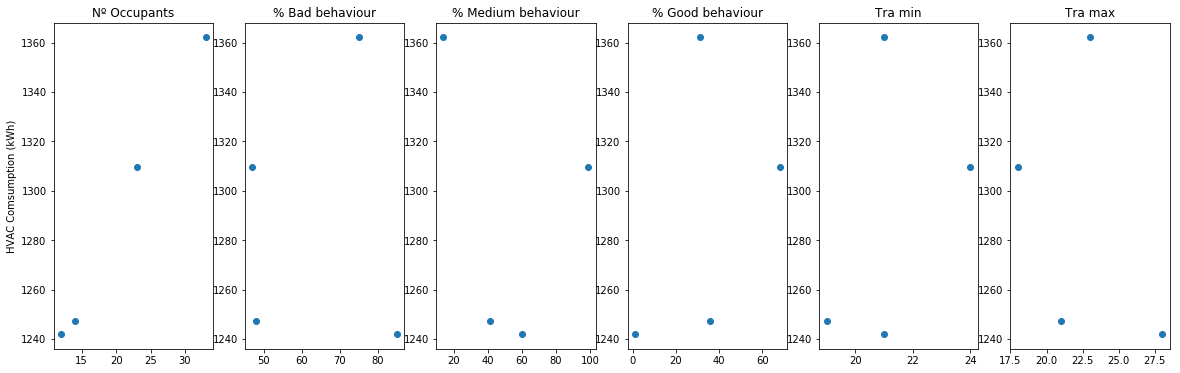

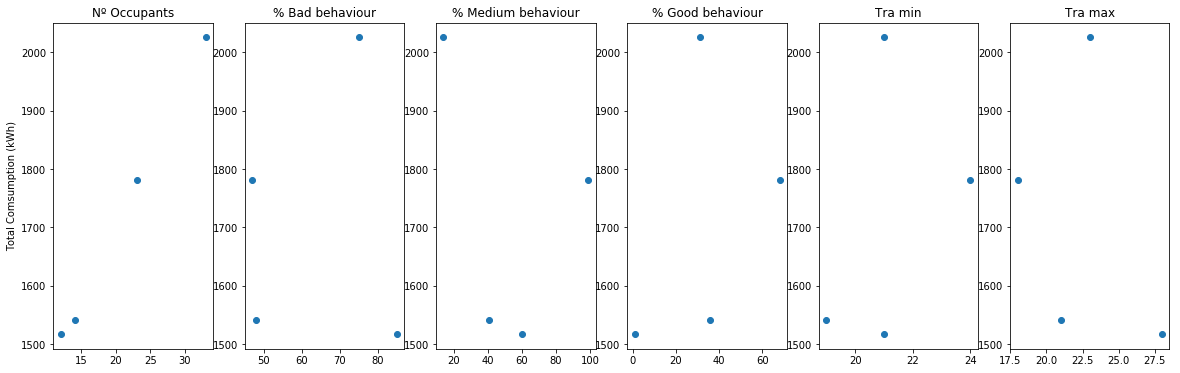

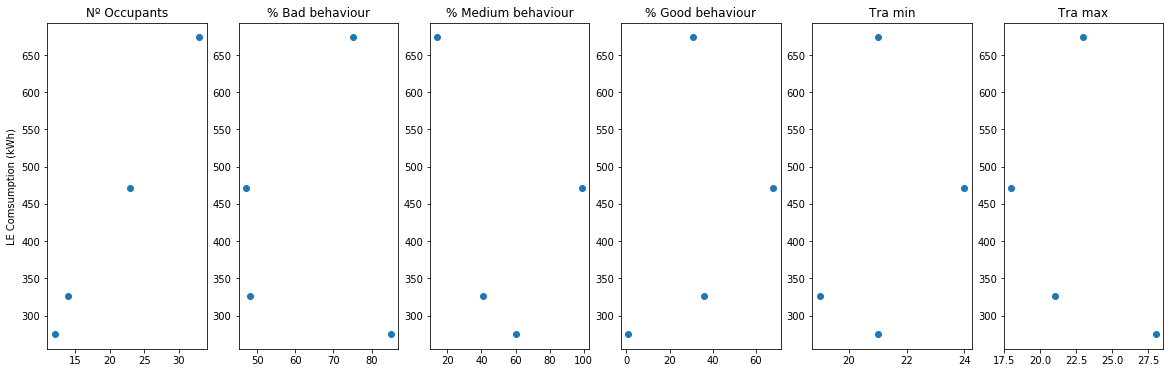

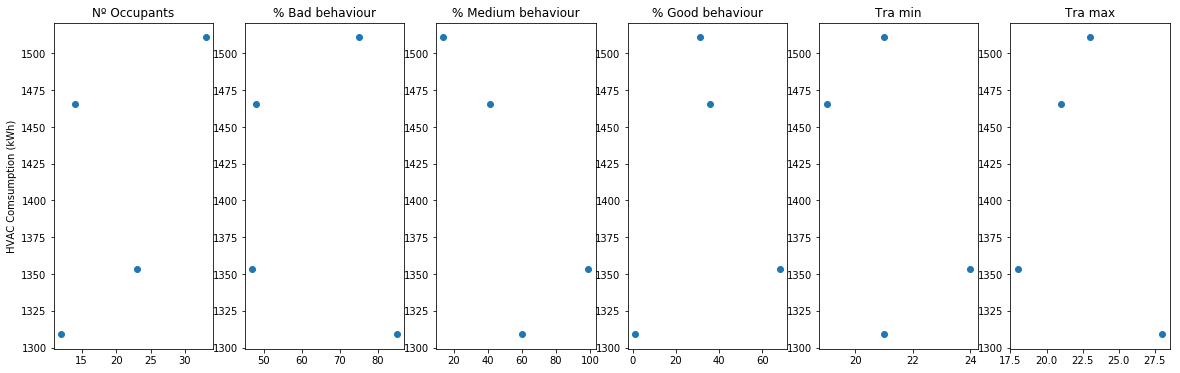

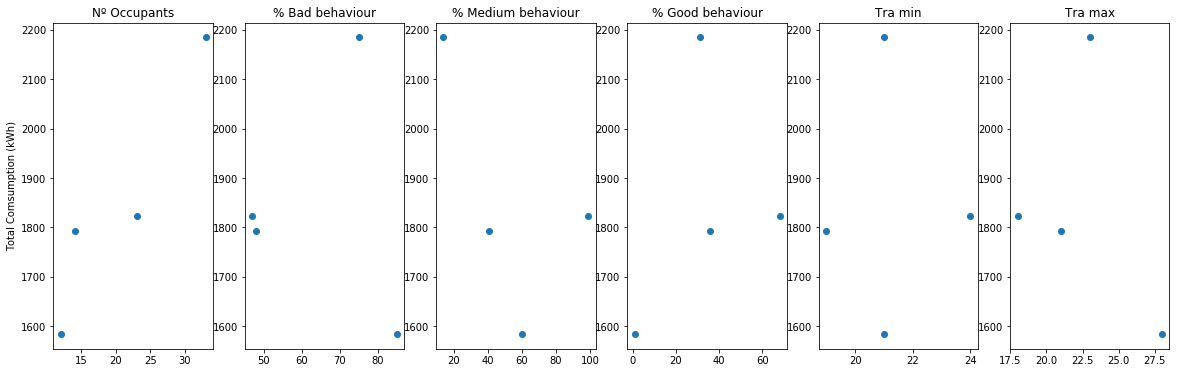

[673.60779999999863, 275.21279999999979, 326.75099999999992, 470.91354999999959] [663.13179999999932, 275.4509500000002, 293.9051999999997, 471.03814999999929]


In [54]:
EnergyLE0 = []
EnergyHVAC0 = []
EnergyTotal0 = []

EnergyLE1 = []
EnergyHVAC1 = []
EnergyTotal1 = []

EnergyLE2 = []
EnergyHVAC2 = []
EnergyTotal2 = []

print(y0)
print(y1)
print(y2)

for i in y0:
    EnergyLE0.append(i[1]/1000)
    EnergyHVAC0.append(i[2]/1000)
    EnergyTotal0.append(i[0]/1000)

    
for i in y1:
    EnergyLE1.append(i[1]/1000)
    EnergyHVAC1.append(i[2]/1000)
    EnergyTotal1.append(i[0]/1000)
    
    
for i in y2:
    EnergyLE2.append(i[1]/1000)
    EnergyHVAC2.append(i[2]/1000)
    EnergyTotal2.append(i[0]/1000)


# Model 0
# LE
plt.figure(figsize = (20,6))
plt.subplot(161)
plt.scatter(people, EnergyLE0)
plt.title("Nº Occupants")
plt.ylabel("LE Comsumption (kWh)")
plt.subplot(162)
plt.scatter(behaviour1, EnergyLE0)
plt.title("% Bad behaviour")
plt.subplot(163)
plt.scatter(behaviour2, EnergyLE0)
plt.title("% Medium behaviour")
plt.subplot(164)
plt.scatter(behaviour3, EnergyLE0)
plt.title("% Good behaviour")
plt.subplot(165)
plt.scatter(temperature1, EnergyLE0)
plt.title("Tra min")
plt.subplot(166)
plt.scatter(temperature2, EnergyLE0)
plt.title("Tra max")
plt.show()
# HVAC
plt.figure(figsize = (20,6))
plt.subplot(161)
plt.scatter(people, EnergyHVAC0)
plt.title("Nº Occupants")
plt.ylabel("HVAC Comsumption (kWh)")
plt.subplot(162)
plt.scatter(behaviour1, EnergyHVAC0)
plt.title("% Bad behaviour")
plt.subplot(163)
plt.scatter(behaviour2, EnergyHVAC0)
plt.title("% Medium behaviour")
plt.subplot(164)
plt.scatter(behaviour3, EnergyHVAC0)
plt.title("% Good behaviour")
plt.subplot(165)
plt.scatter(temperature1, EnergyHVAC0)
plt.title("Tra min")
plt.subplot(166)
plt.scatter(temperature2, EnergyHVAC0)
plt.title("Tra max")
plt.show()
# TOTAL
plt.figure(figsize = (20,6))
plt.subplot(161)
plt.scatter(people, EnergyTotal0)
plt.title("Nº Occupants")
plt.ylabel("Total Comsumption (kWh)")
plt.subplot(162)
plt.scatter(behaviour1, EnergyTotal0)
plt.title("% Bad behaviour")
plt.subplot(163)
plt.scatter(behaviour2, EnergyTotal0)
plt.title("% Medium behaviour")
plt.subplot(164)
plt.scatter(behaviour3, EnergyTotal0)
plt.title("% Good behaviour")
plt.subplot(165)
plt.scatter(temperature1, EnergyTotal0)
plt.title("Tra min")
plt.subplot(166)
plt.scatter(temperature2, EnergyTotal0)
plt.title("Tra max")
plt.show()


# Model 1
# LE
plt.figure(figsize = (20,6))
plt.subplot(161)
plt.scatter(people, EnergyLE1)
plt.title("Nº Occupants")
plt.ylabel("LE Comsumption (kWh)")
plt.subplot(162)
plt.scatter(behaviour1, EnergyLE1)
plt.title("% Bad behaviour")
plt.subplot(163)
plt.scatter(behaviour2, EnergyLE1)
plt.title("% Medium behaviour")
plt.subplot(164)
plt.scatter(behaviour3, EnergyLE1)
plt.title("% Good behaviour")
plt.subplot(165)
plt.scatter(temperature1, EnergyLE1)
plt.title("Tra min")
plt.subplot(166)
plt.scatter(temperature2, EnergyLE1)
plt.title("Tra max")
plt.show()
# HVAC
plt.figure(figsize = (20,6))
plt.subplot(161)
plt.scatter(people, EnergyHVAC1)
plt.title("Nº Occupants")
plt.ylabel("HVAC Comsumption (kWh)")
plt.subplot(162)
plt.scatter(behaviour1, EnergyHVAC1)
plt.title("% Bad behaviour")
plt.subplot(163)
plt.scatter(behaviour2, EnergyHVAC1)
plt.title("% Medium behaviour")
plt.subplot(164)
plt.scatter(behaviour3, EnergyHVAC1)
plt.title("% Good behaviour")
plt.subplot(165)
plt.scatter(temperature1, EnergyHVAC1)
plt.title("Tra min")
plt.subplot(166)
plt.scatter(temperature2, EnergyHVAC1)
plt.title("Tra max")
plt.show()
# TOTAL
plt.figure(figsize = (20,6))
plt.subplot(161)
plt.scatter(people, EnergyTotal1)
plt.title("Nº Occupants")
plt.ylabel("Total Comsumption (kWh)")
plt.subplot(162)
plt.scatter(behaviour1, EnergyTotal1)
plt.title("% Bad behaviour")
plt.subplot(163)
plt.scatter(behaviour2, EnergyTotal1)
plt.title("% Medium behaviour")
plt.subplot(164)
plt.scatter(behaviour3, EnergyTotal1)
plt.title("% Good behaviour")
plt.subplot(165)
plt.scatter(temperature1, EnergyTotal1)
plt.title("Tra min")
plt.subplot(166)
plt.scatter(temperature2, EnergyTotal1)
plt.title("Tra max")
plt.show()

# Model 2
# LE
plt.figure(figsize = (20,6))
plt.subplot(161)
plt.scatter(people, EnergyLE2)
plt.title("Nº Occupants")
plt.ylabel("LE Comsumption (kWh)")
plt.subplot(162)
plt.scatter(behaviour1, EnergyLE2)
plt.title("% Bad behaviour")
plt.subplot(163)
plt.scatter(behaviour2, EnergyLE2)
plt.title("% Medium behaviour")
plt.subplot(164)
plt.scatter(behaviour3, EnergyLE2)
plt.title("% Good behaviour")
plt.subplot(165)
plt.scatter(temperature1, EnergyLE2)
plt.title("Tra min")
plt.subplot(166)
plt.scatter(temperature2, EnergyLE2)
plt.title("Tra max")
plt.show()
# HVAC
plt.figure(figsize = (20,6))
plt.subplot(161)
plt.scatter(people, EnergyHVAC2)
plt.title("Nº Occupants")
plt.ylabel("HVAC Comsumption (kWh)")
plt.subplot(162)
plt.scatter(behaviour1, EnergyHVAC2)
plt.title("% Bad behaviour")
plt.subplot(163)
plt.scatter(behaviour2, EnergyHVAC2)
plt.title("% Medium behaviour")
plt.subplot(164)
plt.scatter(behaviour3, EnergyHVAC2)
plt.title("% Good behaviour")
plt.subplot(165)
plt.scatter(temperature1, EnergyHVAC2)
plt.title("Tra min")
plt.subplot(166)
plt.scatter(temperature2, EnergyHVAC2)
plt.title("Tra max")
plt.show()
# TOTAL
plt.figure(figsize = (20,6))
plt.subplot(161)
plt.scatter(people, EnergyTotal2)
plt.title("Nº Occupants")
plt.ylabel("Total Comsumption (kWh)")
plt.subplot(162)
plt.scatter(behaviour1, EnergyTotal2)
plt.title("% Bad behaviour")
plt.subplot(163)
plt.scatter(behaviour2, EnergyTotal2)
plt.title("% Medium behaviour")
plt.subplot(164)
plt.scatter(behaviour3, EnergyTotal2)
plt.title("% Good behaviour")
plt.subplot(165)
plt.scatter(temperature1, EnergyTotal2)
plt.title("Tra min")
plt.subplot(166)
plt.scatter(temperature2, EnergyTotal2)
plt.title("Tra max")
plt.show()

print(EnergyLE2, EnergyLE1)


#plt.savefig('scatter.png')

In [18]:
morris_problem = {

    'num_vars': 6,

    'names': ['people', 'temperature1', 'temperature2', 
              'behaviour1', 'behaviour2', 'behaviour3'],

    'bounds': [
            [0, 40],
            [18, 30],
            [18, 30],
            [0, 100],
            [0, 100],
            [0, 100]
              ],

    'groups': None

    }

In [19]:
output = EnergyLE0
sample = data

Si = ma.analyze(morris_problem, sample, output, print_to_console=False)
print("{:20s} {:>7s} {:>7s} {:>7s}".format("Name", "mu", "mu_star", "sigma"))
for name, s1, st, mean in zip(morris_problem['names'], 
                              Si['mu'], 
                              Si['mu_star'], 
                              Si['sigma']):
    print("{:20s} {:=7.2f} {:=7.2f} {:=7.2f}".format(name, s1, st, mean))

AttributeError: 'list' object has no attribute 'dtype'